The dataset used in this notebook can be found in the folder of the project.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
salary_data = pd.read_csv("Salary_Data.csv")

In [3]:
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


As you can see we have 30 employees in the dataset with different number of years of experience. We are trying to make regressor so we can easily predict/decide on salary for totally new employee.

## Preprocessing

    1. We will need to separate data into Features and labels
    2. Create training and testing parts of the dataset
    
    In this situation we wont need to scale data because we have just one feature.

In [4]:
X = salary_data.iloc[:, :-1].values
y = salary_data.iloc[:, -1].values

### 2. Train and test set

In [6]:
from sklearn.cross_validation import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Regression part

In [9]:
from sklearn.linear_model import LinearRegression, Ridge

In [10]:
lRegressor = LinearRegression()
lRegressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
rig = Ridge(alpha=1.0)
rig.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [13]:
pred_1 = lRegressor.predict(X_test)
pred_2 = rig.predict(X_test)

In [14]:
print("R^2 score for Linear Regression: ", lRegressor.score(X_test, y_test))

R^2 score for Linear Regression:  0.925437927773


In [15]:
print("R^2 score for Ridge regression: ", rig.score(X_test, y_test))

R^2 score for Ridge regression:  0.925002520196


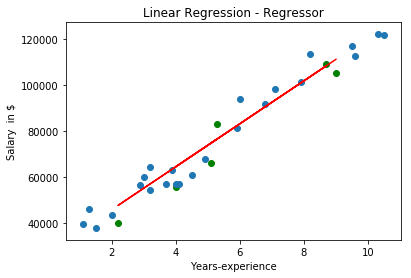

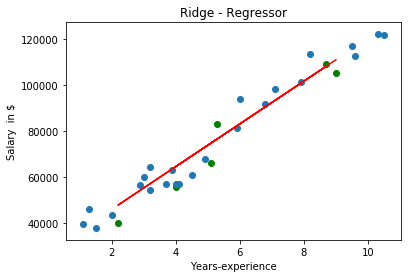

In [30]:
plt.scatter(X_test, y_test, c='g')
plt.scatter(X_train, y_train)
plt.plot(X_test, pred_1, c='r')
plt.title("Linear Regression - Regressor")
plt.xlabel("Years-experience")
plt.ylabel("Salary  in $")
plt.show()

plt.scatter(X_test, y_test, c='g')
plt.scatter(X_train, y_train)
plt.plot(X_test, pred_2, c='r')
plt.title("Ridge - Regressor")
plt.xlabel("Years-experience")
plt.ylabel("Salary  in $")
plt.show()

#### Let's try to improve Ridge regression with Grid Search CV

In [31]:
from sklearn.grid_search import GridSearchCV

In [32]:
params = {'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag'], 'max_iter':[1000, 10000]}

In [33]:
gs = GridSearchCV(rig, params, cv=5, verbose=10)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] solver=auto, max_iter=1000 ......................................
[CV] ............. solver=auto, max_iter=1000, score=0.957247 -   0.0s
[CV] solver=auto, max_iter=1000 ......................................
[CV] ............. solver=auto, max_iter=1000, score=0.937050 -   0.0s
[CV] solver=auto, max_iter=1000 ......................................
[CV] ............. solver=auto, max_iter=1000, score=0.881413 -   0.0s
[CV] solver=auto, max_iter=1000 ......................................
[CV] ............. solver=auto, max_iter=1000, score=0.813687 -   0.0s
[CV] solver=auto, max_iter=1000 ......................................
[CV] ............. solver=auto, max_iter=1000, score=0.474748 -   0.0s
[CV] solver=svd, max_iter=1000 .......................................
[CV] .............. solver=svd, max_iter=1000, score=0.957247 -   0.0s
[CV] solver=svd, max_iter=1000 .......................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  12 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  24 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  60 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag'], 'max_iter': [1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=10)

In [34]:
print(gs.best_params_)

{'solver': 'auto', 'max_iter': 1000}


In [35]:
improved_rig = Ridge(solver='auto', max_iter=1000, alpha=1.0)

In [36]:
improved_rig.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [37]:
print("R^2 on the Ridge regressor, tuned: ", improved_rig.score(X_test, y_test))

R^2 on the Ridge regressor, tuned:  0.925002520196


### Tree Regression

In [38]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
dtr = DecisionTreeRegressor(max_depth=100)

In [62]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=100, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

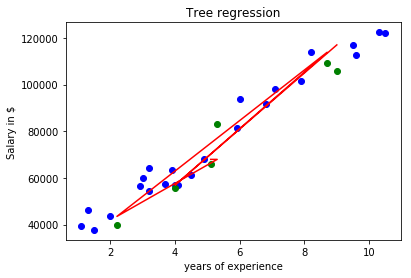

In [78]:
plt.scatter(X_train, y_train, c='b')
plt.scatter(X_test, y_test, c='g')
plt.plot(X_test, dtr.predict(X_test), c='r')
plt.title("Tree regression")
plt.xlabel("years of experience")
plt.ylabel("Salary in $")
plt.show()

In [64]:
dtr.predict(X_test)

array([ 116969.,   56957.,  113812.,   43525.,   67938.,   67938.])

In [71]:
print("R^2 score for Tree: ", dtr.score(X_test, y_test))

R^2 score for Tree:  0.897047881196


### Improve Tree with AdaBoost

In [65]:
from sklearn.ensemble import AdaBoostRegressor

In [67]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=100), n_estimators=300)
ada_reg.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=100, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=300,
         random_state=None)

In [68]:
ada_reg.predict(X_test)

array([ 113812.,   58820.,  113812.,   43525.,   67938.,   67938.])

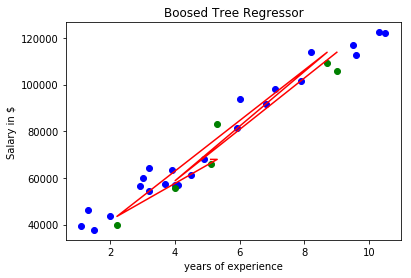

In [77]:
plt.scatter(X_train, y_train, c='b')
plt.scatter(X_test, y_test, c='g')
plt.plot(X_test, ada_reg.predict(X_test), c='r')
plt.title("Boosed Tree Regressor")
plt.xlabel("years of experience")
plt.ylabel("Salary in $")
plt.show()

In [70]:
print("R^2 score for Tree boosted witha Ada: ", ada_reg.score(X_test, y_test))

R^2 score for Tree boosted witha Ada:  0.911099102673


By boosting Tree we achieved improvement of 2%.

### (Optional) Testing Liner Regression from scratch

In [72]:
from linear_regression_numpy import *

In [73]:
lr_numpy = LinearRegressioN()

In [74]:
lr_numpy.train(X_train, y_train)

(array([ 26747.18889182]), array([ 9407.5255039]))

In [75]:
pred_numpy_lr = lr_numpy.predict(X_test)

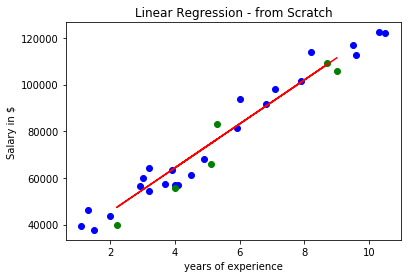

In [76]:
plt.scatter(X_train, y_train, c='b')
plt.scatter(X_test, y_test, c='g')
plt.plot(X_test, pred_numpy_lr, c='r')
plt.title("Linear Regression - from Scratch")
plt.xlabel("years of experience")
plt.ylabel("Salary in $")
plt.show()